In [ ]:
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import svm
from sklearn import neighbors
from sklearn import ensemble
from sklearn import tree
from sklearn import datasets
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Ideja algoritma `Adaboost` je vrlo jednostavna. Bira se bazni klasifikator koji se obucava na skupu za obucavanje, pri
cemu su originalnom skupu za obucavanje dodeljene jednake tezine (najcesce $\frac{1}{m}$ ako postoji $m$ instanci).

Potom se pogledaju instance koje je klasifikator lose klasifikovao, njima se povecava tezina cime se novi klasifikator usmerava da vise paznje posveti tim instancama.

Termin `boosting` - pojacavanje dolazi usled ideje da klasifikatori pojacavaju jedni druge, odnosno mane koje ima $i$-ti klasifikator, neki od narednih klasifikatora ce da nadomesti.

AdaBoost koristi najcesce stabla odlucivanja dubine 1, takozvane `tree stump` - odnosno stabla dubine 1.

Konstruisemo skup podataka koji nije linearno separabilan.

In [ ]:
# Construct dataset
X1, y1 = datasets.make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = datasets.make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

Konstruisemo AdaBoost algoritam nad stablima i obucavamo ga nad generisanim podacima.

In [ ]:
# Create and fit an AdaBoosted decision tree
bdt = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

bdt.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

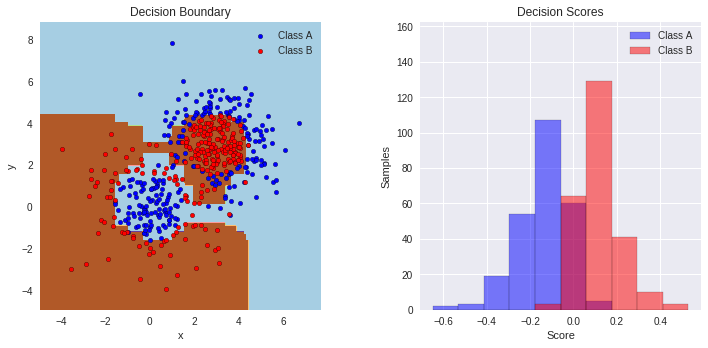

In [ ]:
plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

# Plot the two-class decision scores
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5,
             edgecolor='k')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()